In [124]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# 1. Data collection

In [125]:
data=pd.read_excel("C:/Users/Olga/Desktop/Data/FoodAccessResearchAtlasData2019_orig.xlsx")

## 1.1 Examining the data

In [126]:
data.empty

False

In [127]:
data.shape

(72531, 147)

In [128]:
data.head(30)

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
5,1001020600,Alabama,Autauga County,1,3668,1311,0,0.0,0.000000,1,...,411.0,2751.0,740.0,9.0,1.0,10.0,157.0,176.0,71.0,224.0
6,1001020700,Alabama,Autauga County,1,2891,1188,0,36.0,1.245244,1,...,360.0,2333.0,435.0,13.0,3.0,11.0,96.0,98.0,34.0,390.0
7,1001020801,Alabama,Autauga County,0,3081,1074,0,0.0,0.000000,0,...,341.0,2690.0,278.0,16.0,0.0,27.0,70.0,57.0,68.0,143.0
8,1001020802,Alabama,Autauga County,0,10435,3694,0,0.0,0.000000,0,...,1060.0,8744.0,1387.0,61.0,7.0,49.0,187.0,159.0,198.0,352.0
9,1001020900,Alabama,Autauga County,0,5675,2067,0,14.0,0.246696,0,...,630.0,4835.0,679.0,20.0,3.0,14.0,124.0,96.0,97.0,340.0


In [129]:
data.tail(30)

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
72501,56033000300,Wyoming,Sheridan County,1,3586,1752,0,8.0,0.223090,0,...,742.0,3439.0,6.0,28.0,0.0,24.0,89.0,138.0,209.0,163.0
72502,56033000400,Wyoming,Sheridan County,1,5675,2314,0,130.0,2.290749,0,...,572.0,5370.0,22.0,59.0,9.0,57.0,158.0,264.0,13.0,103.0
72503,56033000500,Wyoming,Sheridan County,0,6541,2736,0,0.0,0.000000,0,...,1060.0,6376.0,6.0,13.0,0.0,47.0,99.0,120.0,18.0,28.0
72504,56033000600,Wyoming,Sheridan County,0,4697,1716,0,327.0,6.961891,0,...,675.0,4435.0,26.0,29.0,4.0,131.0,72.0,142.0,11.0,67.0
72505,56035000101,Wyoming,Sublette County,0,4321,1541,0,525.0,12.149965,0,...,463.0,3962.0,12.0,12.0,0.0,48.0,287.0,359.0,12.0,16.0
72506,56035000102,Wyoming,Sublette County,0,5926,2365,0,25.0,0.421870,0,...,576.0,5590.0,20.0,39.0,1.0,39.0,237.0,353.0,32.0,56.0
72507,56037970500,Wyoming,Sweetwater County,0,2720,1146,0,0.0,0.000000,0,...,282.0,2400.0,20.0,19.0,1.0,19.0,261.0,415.0,20.0,74.0
72508,56037970601,Wyoming,Sweetwater County,0,4675,1709,0,135.0,2.887701,0,...,334.0,4133.0,32.0,12.0,2.0,65.0,431.0,928.0,80.0,103.0
72509,56037970602,Wyoming,Sweetwater County,1,3471,1131,0,0.0,0.000000,0,...,145.0,3252.0,12.0,14.0,3.0,27.0,163.0,415.0,17.0,33.0
72510,56037970700,Wyoming,Sweetwater County,0,3709,1359,0,56.0,1.509841,0,...,464.0,3472.0,21.0,24.0,4.0,23.0,165.0,312.0,31.0,65.0


In [130]:
data.columns

Index(['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010',
       'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10',
       ...
       'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI',
       'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP'],
      dtype='object', length=147)

In [131]:
data.dtypes

CensusTract        int64
State             object
County            object
Urban              int64
Pop2010            int64
                  ...   
TractAIAN        float64
TractOMultir     float64
TractHispanic    float64
TractHUNV        float64
TractSNAP        float64
Length: 147, dtype: object

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


## 1.2 Describing and summarizing the data

In [133]:
data.describe(include='all')

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7.253100e+04,72531,72531,72531.000000,72531.000000,72531.000000,72531.000000,72506.000000,72506.000000,72531.000000,...,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000
unique,NaN,51,1877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,California,Los Angeles County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8024,2334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.782573e+10,NaN,NaN,0.760626,4256.739022,1609.191821,0.007114,110.121549,2.708678,0.128125,...,555.197113,3082.337157,536.756160,202.327685,7.445655,40.152316,387.664649,695.979277,143.709736,201.753182
std,1.581647e+10,NaN,NaN,0.426704,1955.987626,725.676046,0.084046,443.931753,9.570881,0.334231,...,351.805391,1796.364560,889.118109,435.878339,45.186581,177.378696,529.349680,1119.472739,232.738869,185.760089
min,1.001020e+09,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.212708e+10,NaN,NaN,1.000000,2899.000000,1108.000000,0.000000,0.000000,0.000000,0.000000,...,320.000000,1848.000000,43.000000,17.000000,0.000000,7.000000,85.000000,88.000000,36.000000,67.000000
50%,2.712979e+10,NaN,NaN,1.000000,4011.000000,1525.000000,0.000000,7.000000,0.181130,0.000000,...,497.000000,2914.000000,160.000000,58.000000,1.000000,15.000000,186.000000,243.000000,82.000000,152.000000
75%,4.103900e+10,NaN,NaN,1.000000,5330.500000,2021.000000,0.000000,64.000000,1.565217,0.000000,...,718.000000,4118.000000,610.000000,189.000000,5.000000,33.000000,448.000000,751.000000,168.500000,282.000000


In [134]:
data.describe(include='all', percentiles=[0.05, 0.95])

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7.253100e+04,72531,72531,72531.000000,72531.000000,72531.000000,72531.000000,72506.000000,72506.000000,72531.000000,...,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000
unique,NaN,51,1877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,California,Los Angeles County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8024,2334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.782573e+10,NaN,NaN,0.760626,4256.739022,1609.191821,0.007114,110.121549,2.708678,0.128125,...,555.197113,3082.337157,536.756160,202.327685,7.445655,40.152316,387.664649,695.979277,143.709736,201.753182
std,1.581647e+10,NaN,NaN,0.426704,1955.987626,725.676046,0.084046,443.931753,9.570881,0.334231,...,351.805391,1796.364560,889.118109,435.878339,45.186581,177.378696,529.349680,1119.472739,232.738869,185.760089
min,1.001020e+09,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,6.001407e+09,NaN,NaN,0.000000,1649.000000,625.000000,0.000000,0.000000,0.000000,0.000000,...,139.000000,351.000000,7.000000,3.000000,0.000000,2.000000,30.000000,24.000000,7.000000,10.000000
50%,2.712979e+10,NaN,NaN,1.000000,4011.000000,1525.000000,0.000000,7.000000,0.181130,0.000000,...,497.000000,2914.000000,160.000000,58.000000,1.000000,15.000000,186.000000,243.000000,82.000000,152.000000
95%,5.176007e+10,NaN,NaN,1.000000,7550.500000,2844.000000,0.000000,415.000000,11.230511,1.000000,...,1144.700000,6197.000000,2429.000000,883.000000,25.000000,103.000000,1501.000000,3140.700000,446.000000,560.000000


In [135]:
data['Pop2010'].var()

3825887.594525679

In [136]:
data['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [137]:
data['CensusTract'].unique()

array([ 1001020100,  1001020200,  1001020300, ..., 56043000302,
       56045951100, 56045951300], dtype=int64)

## 1.3 Grabbing subsets of the data

In [151]:
data_sub=data.loc[(data.State=='Kentucky')]

In [152]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 27007 to 28116
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 1.3+ MB


## 1.4 Adding and removing data

In [161]:
columns_to_delete = []
for col in data_sub.columns:
    sum_col=data_sub[col].sum()

    if sum_col == 0.0:
        columns_to_delete.append(col)

data_sub = data_sub.drop(columns=columns_to_delete, axis=1)
print(data_sub.info())



<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 27007 to 28116
Columns: 120 entries, Tract to TotalSNAPHousing
dtypes: float64(100), int64(18), object(2)
memory usage: 1.0+ MB
None


In [153]:
data_modify=data_sub.copy()

In [154]:
data_modify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 27007 to 28116
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 1.3+ MB


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


# 2. Exploratory data analysis (EDA)

## 2.1 Data wrangling

### Data cleaning

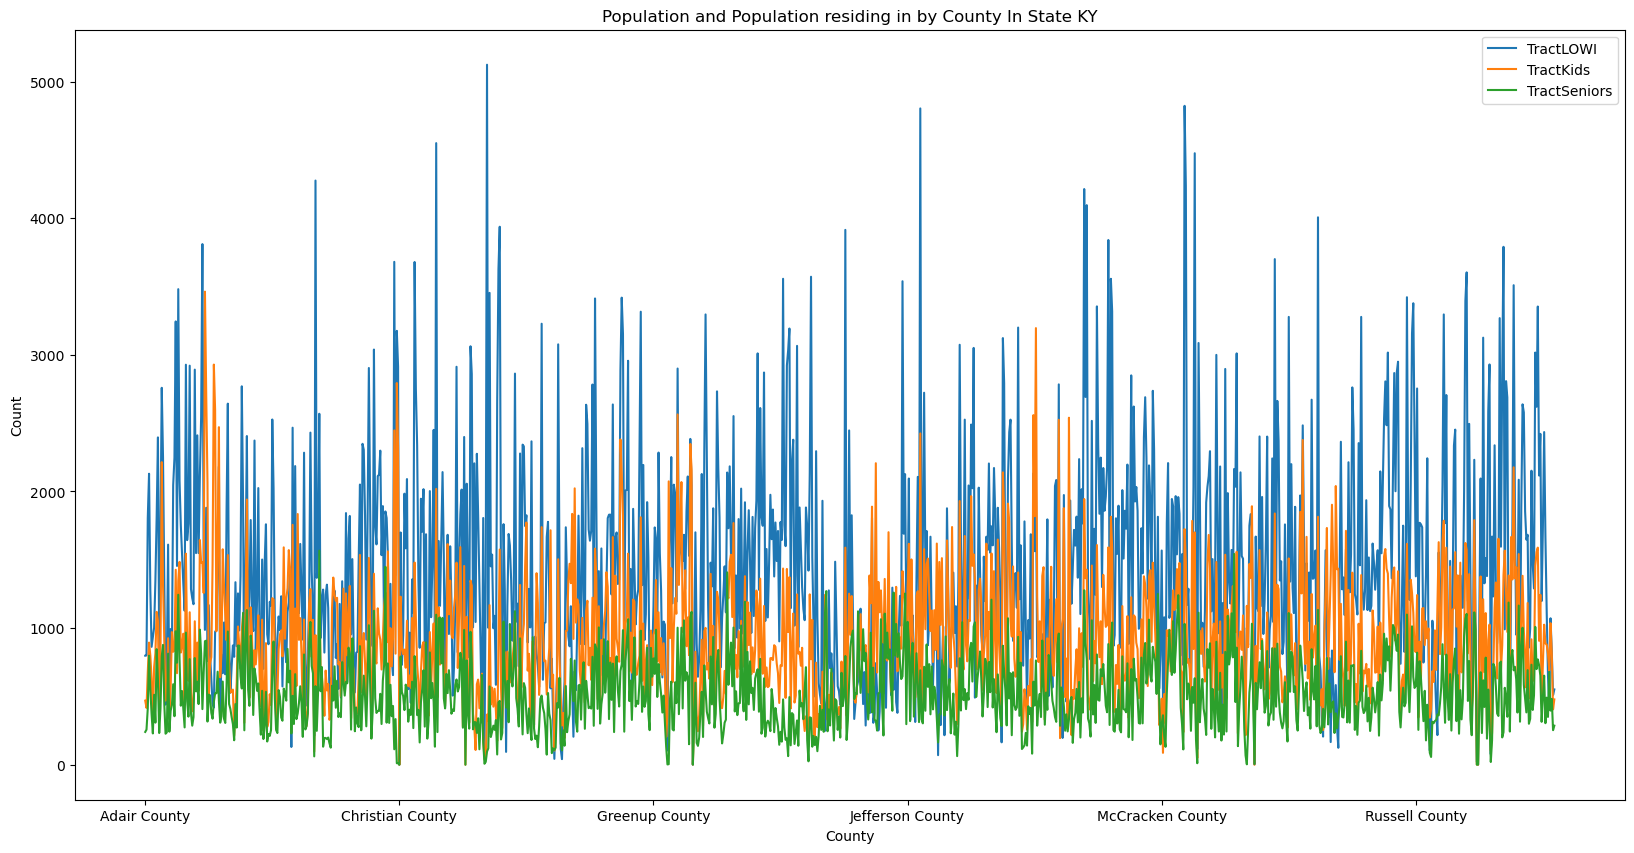

In [156]:
data_sub.plot(kind='line', y=['TractLOWI','TractKids','TractSeniors'],x='County',title='Population and Population residing in by County In State KY',figsize=(20, 10)).set_ylabel('Count')
plt.show()

In [160]:
data_sub.head()


,Tract,State,County,Urban Flag,Pop2010,Housing Units 2010,HighOccupancyFlag,GroupQuartersCount,GroupQuartersPercent,LowIncomeLowAccessFlag1_10,...,TotalSeniorsPop,TotalWhitePop,TotalBlackPop,TotalAsianPop,TotalPacificIslanderPop,TotalNativePop,TotalOtherRacePop,TotalHispanicPop,TotalNoVehicleHousing,TotalSNAPHousing
27007,21001970100,Kentucky,Adair County,0,1727,649,0,0.0,0.000000,1,...,240.0,1683.0,14.0,0.0,1.0,1.0,28.0,37.0,31.0,97.0
27008,21001970200,Kentucky,Adair County,0,1722,696,0,32.0,1.858304,0,...,257.0,1635.0,41.0,0.0,0.0,5.0,41.0,45.0,17.0,114.0
27009,21001970300,Kentucky,Adair County,0,3016,1228,0,0.0,0.000000,0,...,413.0,2944.0,6.0,8.0,0.0,11.0,47.0,56.0,47.0,224.0
27010,21001970401,Kentucky,Adair County,0,4070,1760,0,148.0,3.636364,0,...,798.0,3716.0,237.0,16.0,1.0,1.0,99.0,63.0,251.0,371.0
27011,21001970402,Kentucky,Adair County,0,4261,1404,0,875.0,20.535086,0,...,552.0,3950.0,180.0,16.0,3.0,16.0,96.0,81.0,67.0,144.0


#### Renaming columns

In [159]:

data_sub.rename(columns={'CensusTract':'Tract',
'State':'State',
'County':'County',
'Urban':'Urban Flag',
'POP2010':'Population 2010',
'OHU2010':'Housing Units 2010',
'GroupQuartersFlag':'HighOccupancyFlag',
'NUMGQTRS':'GroupQuartersCount',
'PCTGQTRS':'GroupQuartersPercent',
'LILATracts_1And10':'LowIncomeLowAccessFlag1_10',
'LILATracts_halfAnd10':'LowIncomeLowAccessFlag0.5_10',
'LILATracts_1And20':'LowIncomeLowAccessFlag1_20',
'LILATracts_Vehicle':'LowIncomeLowAccessFlagVehicle_20',
'HUNVFlag':'NoVehicleHighDistanceFlag',
'LowIncomeTracts':'LowIncomeTractFlag',
'PovertyRate':'PovertyShare',
'MedianFamilyIncome':'MedianIncome',
'LA1and10':'LowAccessFlag1_10',
'LAhalfand10':'LowAccessFlag0.5_10',
'LA1and20':'LowAccessFlag1_20',
'LATracts_half':'LowAccessFlag0.5',
'LATracts1':'LowAccessFlag1',
'LATracts10':'LowAccessFlag10',
'LATracts20':'LowAccessFlag20',
'LATractsVehicle_20':'ComplexAccessFlag',
'LAPOP1_10':'PopBeyond1_10',
'LAPOP05_10':'PopBeyond0.5_10',
'LAPOP1_20':'PopBeyond1_20',
'LALOWI1_10':'LowIncomePopBeyond1_10',
'LALOWI05_10':'LowIncomePopBeyond0.5_10',
'LALOWI1_20':'LowIncomePopBeyond1_20',
'lapophalf':'PopBeyond0.5',
'lapophalfshare':'ShareBeyond0.5',
'lalowihalf':'LowIncomePopBeyond0.5',
'lalowihalfshare':'ShareLowIncomeBeyond0.5',
'lakidshalf':'KidsPopBeyond0.5',
'lakidshalfshare':'ShareKidsBeyond0.5',
'laseniorshalf':'SeniorsPopBeyond0.5',
'laseniorshalfshare':'ShareSeniorsBeyond0.5',
'lawhitehalf':'WhitePopBeyond0.5',
'lawhitehalfshare':'ShareWhiteBeyond0.5',
'lablackhalf':'BlackPopBeyond0.5',
'lablackhalfshare':'ShareBlackBeyond0.5',
'laasianhalf':'AsianPopBeyond0.5',
'laasianhalfshare':'ShareAsianBeyond0.5',
'lanhopihalf':'PacificIslanderPopBeyond0.5',
'lanhopihalfshare':'SharePacificIslanderBeyond0.5',
'laaianhalf':'NativePopBeyond0.5',
'laaianhalfshare':'ShareNativeBeyond0.5',
'laomultirhalf':'OtherRacePopBeyond0.5',
'laomultirhalfshare':'ShareOtherRaceBeyond0.5',
'lahisphalf':'HispanicPopBeyond0.5',
'lahisphalfshare':'ShareHispanicBeyond0.5',
'lahunvhalf':'NoVehicleHousingBeyond0.5',
'lahunvhalfshare':'ShareNoVehicleHousingBeyond0.5',
'lasnaphalf':'SNAPCountBeyond0.5',
'lasnaphalfshare':'SNAPShareBeyond0.5',
'lapop1':'PopBeyond1',
'lapop1share':'ShareBeyond1',
'lalowi1':'LowIncomePopBeyond1',
'lalowi1share':'ShareLowIncomeBeyond1',
'lakids1':'KidsPopBeyond1',
'lakids1share':'ShareKidsBeyond1',
'laseniors1':'SeniorsPopBeyond1',
'laseniors1share':'ShareSeniorsBeyond1',
'lawhite1':'WhitePopBeyond1',
'lawhite1share':'ShareWhiteBeyond1',
'lablack1':'BlackPopBeyond1',
'lablack1share':'ShareBlackBeyond1',
'laasian1':'AsianPopBeyond1',
'laasian1share':'ShareAsianBeyond1',
'lanhopi1':'PacificIslanderPopBeyond1',
'lanhopi1share':'SharePacificIslanderBeyond1',
'laaian1':'NativePopBeyond1',
'laaian1share':'ShareNativeBeyond1',
'laomultir1':'OtherRacePopBeyond1',
'laomultir1share':'ShareOtherRaceBeyond1',
'lahisp1':'HispanicPopBeyond1',
'lahisp1share':'ShareHispanicBeyond1',
'lahunv1':'NoVehicleHousingBeyond1',
'lahunv1share':'ShareNoVehicleHousingBeyond1',
'lasnap1':'SNAPCountBeyond1',
'lasnap1share':'SNAPShareBeyond1',
'lapop10':'PopBeyond10',
'lapop10share':'ShareBeyond10',
'lalowi10':'LowIncomePopBeyond10',
'lalowi10share':'ShareLowIncomeBeyond10',
'lakids10':'KidsPopBeyond10',
'lakids10share':'ShareKidsBeyond10',
'laseniors10':'SeniorsPopBeyond10',
'laseniors10share':'ShareSeniorsBeyond10',
'lawhite10':'WhitePopBeyond10',
'lawhite10share':'ShareWhiteBeyond10',
'lablack10':'BlackPopBeyond10',
'lablack10share':'ShareBlackBeyond10',
'laasian10':'AsianPopBeyond10',
'laasian10share':'ShareAsianBeyond10',
'lanhopi10':'PacificIslanderPopBeyond10',
'lanhopi10share':'SharePacificIslanderBeyond10',
'laaian10':'NativePopBeyond10',
'laaian10share':'ShareNativeBeyond10',
'laomultir10':'OtherRacePopBeyond10',
'laomultir10share':'ShareOtherRaceBeyond10',
'lahisp10':'HispanicPopBeyond10',
'lahisp10share':'ShareHispanicBeyond10',
'lahunv10':'NoVehicleHousingBeyond10',
'lahunv10share':'ShareNoVehicleHousingBeyond10',
'lasnap10':'SNAPCountBeyond10',
'lasnap10share':'SNAPShareBeyond10',
'lapop20':'PopBeyond20',
'lapop20share':'ShareBeyond20',
'lalowi20':'LowIncomePopBeyond20',
'lalowi20share':'ShareLowIncomeBeyond20',
'lakids20':'KidsPopBeyond20',
'lakids20share':'ShareKidsBeyond20',
'laseniors20':'SeniorsPopBeyond20',
'laseniors20share':'ShareSeniorsBeyond20',
'lawhite20':'WhitePopBeyond20',
'lawhite20share':'ShareWhiteBeyond20',
'lablack20':'BlackPopBeyond20',
'lablack20share':'ShareBlackBeyond20',
'laasian20':'AsianPopBeyond20',
'laasian20share':'ShareAsianBeyond20',
'lanhopi20':'PacificIslanderPopBeyond20',
'lanhopi20share':'SharePacificIslanderBeyond20',
'laaian20':'NativePopBeyond20',
'laaian20share':'ShareNativeBeyond20',
'laomultir20':'OtherRacePopBeyond20',
'laomultir20share':'ShareOtherRaceBeyond20',
'lahisp20':'HispanicPopBeyond20',
'lahisp20share':'ShareHispanicBeyond20',
'lahunv20':'NoVehicleHousingBeyond20',
'lahunv20share':'ShareNoVehicleHousingBeyond20',
'lasnap20':'SNAPCountBeyond20',
'lasnap20share':'SNAPShareBeyond20',
'TractLOWI':'TotalLowIncomePop',
'TractKids':'TotalKidsPop',
'TractSeniors':'TotalSeniorsPop',
'TractWhite':'TotalWhitePop',
'TractBlack':'TotalBlackPop',
'TractAsian':'TotalAsianPop',
'TractNHOPI':'TotalPacificIslanderPop',
'TractAIAN':'TotalNativePop',
'TractOMultir':'TotalOtherRacePop',
'TractHispanic':'TotalHispanicPop',
'TractHUNV':'TotalNoVehicleHousing',
'TractSNAP':'TotalSNAPHousing',
},inplace=True)

C:\Users\Olga\AppData\Local\Temp\ipykernel_15680\2297806872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub.rename(columns={'CensusTract':'Tract',


In [162]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1110 entries, 27007 to 28116
Columns: 120 entries, Tract to TotalSNAPHousing
dtypes: float64(100), int64(18), object(2)
memory usage: 1.0+ MB


In [163]:
data_sub.shape

(1110, 120)

In [164]:
data_sub.head()

,Tract,State,County,Urban Flag,Pop2010,Housing Units 2010,HighOccupancyFlag,GroupQuartersCount,GroupQuartersPercent,LowIncomeLowAccessFlag1_10,...,TotalSeniorsPop,TotalWhitePop,TotalBlackPop,TotalAsianPop,TotalPacificIslanderPop,TotalNativePop,TotalOtherRacePop,TotalHispanicPop,TotalNoVehicleHousing,TotalSNAPHousing
27007,21001970100,Kentucky,Adair County,0,1727,649,0,0.0,0.000000,1,...,240.0,1683.0,14.0,0.0,1.0,1.0,28.0,37.0,31.0,97.0
27008,21001970200,Kentucky,Adair County,0,1722,696,0,32.0,1.858304,0,...,257.0,1635.0,41.0,0.0,0.0,5.0,41.0,45.0,17.0,114.0
27009,21001970300,Kentucky,Adair County,0,3016,1228,0,0.0,0.000000,0,...,413.0,2944.0,6.0,8.0,0.0,11.0,47.0,56.0,47.0,224.0
27010,21001970401,Kentucky,Adair County,0,4070,1760,0,148.0,3.636364,0,...,798.0,3716.0,237.0,16.0,1.0,1.0,99.0,63.0,251.0,371.0
27011,21001970402,Kentucky,Adair County,0,4261,1404,0,875.0,20.535086,0,...,552.0,3950.0,180.0,16.0,3.0,16.0,96.0,81.0,67.0,144.0


In [165]:
data_sub.dtypes

Tract                      int64
State                     object
County                    object
Urban Flag                 int64
Pop2010                    int64
                          ...   
TotalNativePop           float64
TotalOtherRacePop        float64
TotalHispanicPop         float64
TotalNoVehicleHousing    float64
TotalSNAPHousing         float64
Length: 120, dtype: object

### Data transformation

### Data enrichment

## 2.2 Data Aggregating

## 2.3 Visualizing Data

## 2.4 Plotting

# 3. Conclusions